#Importação das bibliotecas e métodos

In [1]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importação das bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

#Endereço do dataset da base de dados do SUS


In [3]:
url = "/datacov.csv"

#Leitura do dataset

Aqui ocorre a leitura e a exibição das informações com relação ao dataset

In [4]:
data = pd.read_csv(url)
data.info()
print(f"Read in {len(data)} rows")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554328 entries, 0 to 554327
Columns: 173 entries, DT_NOTIFIC to DT_TRT_COV
dtypes: float64(95), int64(12), object(66)
memory usage: 731.6+ MB
Read in 554328 rows


#Pré Processamento do dataset

Remoção das colunas e linhas de forma manual para melhorar o dataset


Remoção das colunas que sejam redundantes e inuteis para a tarefa de classificação

In [5]:
data.drop(['DT_NASC', 'TP_IDADE','CS_ESCOL_N', 'CO_PAIS', 'DT_DIGITA', 'FNT_IN_COV', 'ID_PAIS','LOTE_2_COV','FAB_COV_1',
        'AVE_SUINO', 'POS_PCRFLU', 'POS_PCROUT', 'HISTO_VGM', 'PCR_SARS2', 'ID_REGIONA','ID_MUNICIP','FAB_COV_2','LAB_PR_COV',
        'ID_UNIDADE', 'ID_RG_RESI', 'ID_MN_RESI', 'ID_RG_INTE', 'ID_MN_INTE', 'COD_IDADE', 'LOTE_1_COV',
          ], axis=1, inplace=True)
data.shape

(554328, 148)

Remoção das linhas em que a coluna EVOLUCAO seja 3 (não informado) e 9 (causa da morte por outros fatores)

In [6]:
aux = data[(data['EVOLUCAO'] == 3) | (data['EVOLUCAO'] == 9)].index
data.drop(aux, inplace=True)
data.shape

(526276, 148)

Passagem do dataset para a variável x e exibição dos dados

In [7]:
x = data
x.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,SG_UF,CO_RG_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,CO_RG_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COVREF,LOTE_REF,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV
0,05/01/2022,1,02/01/2022,1,RJ,NaN,330455,7101856,M,23,6,4,RJ,NaN,330455.0,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,05/01/2022,RJ,NaN,330455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,05/01/2022,4.0,OROFARINGE,2.0,10/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,1.0,05/01/2022,07/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,25/01/2021,22/02/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/01/2022,1,03/01/2022,1,MS,1966.0,500370,2371375,F,37,5,4,MS,1966.0,500370.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1.0,04/01/2022,MS,1966.0,500370.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,04/01/2022,1.0,NaN,1.0,08/01/2022,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,06/01/2022,10/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,04/01/2022,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,07/06/2021,10/09/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/01/2022,1,04/01/2022,1,GO,1791.0,521890,5584108,F,33,5,4,GO,1791.0,521890.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,07/01/2022,GO,1791.0,521890.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,07/01/2022,1.0,NaN,2.0,11/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,NaN,15/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,07/01/2022,2.0,2.0,2.0,2.0,1.0,21/01/2021,17/02/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/01/2022,1,06/01/2022,1,SP,1351.0,354990,6988938,F,16,5,1,SP,1352.0,355410.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,PROVAVEL DOENCA DE LYME,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,06/01/2022,SP,1351.0,354990.0,1.0,06/01/2022,NaN,3.0,NaN,NaN,NaN,1.0,06/01/2022,1.0,NaN,2.0,06/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,09/01/2022,10/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,06/01/2022,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Remoção das linhas que não sejam do estado do Paraná e após ocorre a remoção das colunas que representam o estado, visto que não serão mais necessárias para o restante da tarefa

In [8]:
aux = x[(x['SG_UF_NOT'] != 'PR')].index
x.drop(aux , inplace=True)
x.drop(['SG_UF_NOT','SG_UF','SG_UF_INTE'], axis=1, inplace=True)
x.info()
print(f"Read in {len(x)} rows")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51936 entries, 13 to 554312
Columns: 145 entries, DT_NOTIFIC to DT_TRT_COV
dtypes: float64(90), int64(8), object(47)
memory usage: 57.9+ MB
Read in 51936 rows


Removendo todas as linhas em que o diagnostico não seja COVID-19

In [9]:
aux = x[(x['CLASSI_FIN'] != 5)].index
x.drop(aux , inplace=True)
x.drop(['CLASSI_FIN'], axis=1, inplace=True)
x.info()
print(f"Read in {len(x)} rows")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18222 entries, 62 to 554312
Columns: 144 entries, DT_NOTIFIC to DT_TRT_COV
dtypes: float64(89), int64(8), object(47)
memory usage: 20.2+ MB
Read in 18222 rows


Sepação das colunas em que o 9 representa alguma informação importante do restante, visto que para o restante do dataset o 9 indica que o dado não foi preenchido

In [10]:
number_columns = x[['SEM_NOT','SEM_PRI','NU_IDADE_N','CS_GESTANT','OBES_IMC']]
x.drop(['SEM_NOT','SEM_PRI','NU_IDADE_N','CS_GESTANT','OBES_IMC'], axis=1, inplace=True)
x = x.replace(9, np.nan)
x = pd.concat([x, number_columns], axis=1)

Filtro para remoção das colunas onde tenham mais de 50% dos dados não preenchidos

In [11]:
#remoção das colunas com 50% de dados faltantes
x.dropna(axis=1, thresh=9111, subset=None, inplace=True)
x.shape

(18222, 55)

Filtro para remoção das linhas que tenham mais de 50% dos dados não preenchidos

In [12]:
#Remoção das linhas com 50% de dados faltantes
x.dropna(axis=0, thresh=38, subset=None, inplace=True)
x.shape

(17033, 55)

Ocorre a transformação das datas em dias fazendo a relação entre ambas, assim transformando duas colunas em uma

In [13]:
x['DT_NOTIFIC'] = pd.to_datetime(x['DT_NOTIFIC'])
x['DT_ENCERRA'] = pd.to_datetime(x['DT_ENCERRA'])
x['TEMP_T'] = abs(x['DT_ENCERRA'] - x['DT_NOTIFIC']).dt.days
x = x.drop(['DT_NOTIFIC', 'DT_ENCERRA'],axis=1)

Transformação das datas em o total de dias a partir do dia 0

In [14]:
dates = ['DT_SIN_PRI', 'DT_INTERNA', 'DT_COLETA', 'DT_PCR', 'DT_EVOLUCA', 'DOSE_1_COV', 'DOSE_2_COV']
for column in dates:
  x[column] = pd.to_datetime(x[column],infer_datetime_format=True, errors='coerce' ).apply(datetime.toordinal)
x["CS_SEXO"] = x["CS_SEXO"].replace({"F": 0, "M": 1})
x["EVOLUCAO"] = x["EVOLUCAO"].replace({1 : 0, 2 : 1})


In [15]:
#x.info()

Separação dos dados númericos do restante do dataset, para o preenchimento dos dados faltantes e normalização

In [16]:
dadosnumericos = x[['SEM_NOT', 'SEM_PRI', 'NU_IDADE_N', 'CS_GESTANT', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_COLETA',
                   'DT_PCR', 'DT_EVOLUCA', 'TEMP_T', 'DOSE_1_COV', 'DOSE_2_COV']]

x.drop(columns=['SEM_NOT', 'SEM_PRI', 'NU_IDADE_N', 'CS_GESTANT', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_COLETA',
                   'DT_PCR', 'DT_EVOLUCA', 'TEMP_T', 'DOSE_1_COV', 'DOSE_2_COV'], inplace=True)

#função de preenchimento dos dados faltantes
def preenchimento_NaN(x, estrategia):
  imputer = SimpleImputer(missing_values=np.nan, strategy=estrategia)
  nome = x.columns
  imputer = imputer.fit(x)
  x = imputer.transform(x)
  x = pd.DataFrame(x)
  x.columns = nome
  return x

#função de normalização
def Normalizacao(x, tecnica):
  nome = x.columns
  if(tecnica == 1):
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    x = pd.DataFrame(x)
    x.columns = nome
  else:
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x = pd.DataFrame(x)
    x.columns = nome
  return x

dadosnumericos = preenchimento_NaN(dadosnumericos, 'median')
x = preenchimento_NaN(x, 'most_frequent')

num_MinMax = Normalizacao(dadosnumericos, 1)
num_Standard = Normalizacao(dadosnumericos, 2)

#concatenação dos dados sem normalização
x_SemNorm = pd.concat([x, dadosnumericos], axis=1)
x_SemNorm.loc[x_SemNorm['VACINA_COV'] == 2.0, ['DOSE_1_COV', 'DOSE_2_COV']] = 0

#concatenação dos dados normalizados com MinMax
x_MinMax = pd.concat([x, num_MinMax], axis=1)
x_MinMax.loc[x_MinMax['VACINA_COV'] == 2.0, ['DOSE_1_COV', 'DOSE_2_COV']] = 0

#concatenção do x com os dados normalizados com scaler
x_Standard = pd.concat([x, num_Standard], axis=1)
x_Standard.loc[x_Standard['VACINA_COV'] == 2.0, ['DOSE_1_COV', 'DOSE_2_COV']] = 0

In [17]:
num_MinMax.head()

,SEM_NOT,SEM_PRI,NU_IDADE_N,CS_GESTANT,DT_SIN_PRI,DT_INTERNA,DT_COLETA,DT_PCR,DT_EVOLUCA,TEMP_T,DOSE_1_COV,DOSE_2_COV
0,0.058824,0.039216,0.477064,0.555556,0.038567,0.999498,0.999499,0.999508,0.999386,0.352472,0.994699,0.999374
1,0.058824,0.058824,0.605505,0.666667,0.071625,0.999508,0.999508,0.999508,0.000000,0.076555,0.994650,0.999318
2,0.078431,0.058824,0.642202,0.666667,0.071625,0.999515,0.999515,0.999519,0.999260,0.293461,0.994623,0.999200
3,0.215686,0.117647,0.055046,0.666667,0.123967,0.999537,0.999537,0.999537,0.000000,0.051037,0.995227,0.000000
4,0.392157,0.392157,0.229358,0.555556,0.396694,0.999671,0.999671,0.999683,0.999061,0.014354,0.994814,0.999404


In [18]:
y = x['EVOLUCAO']
datasets = [x_SemNorm, x_MinMax, x_Standard]

for dataset in datasets:
  dataset.drop(columns = 'EVOLUCAO', inplace=True)
#pd.set_option('display.max_rows', None)

# Classificação

Aqui acontece a classificação, utilizando o método de RandomForest com validação cruzada

In [19]:
clf = RandomForestClassifier(max_depth=5, random_state=43)
nomedataset = ["Sem Normalização","com MinMax", "Com Scaler"]
scoring = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}
for dataset, nome in zip(datasets, nomedataset):
  score = cross_validate(clf, dataset, y, cv=10, scoring=scoring)
  accuracy = score['test_accuracy']
  precision = score['test_precision']
  recall = score['test_recall']
  f1 = score['test_f1']
  print(f"Desempenho do RandomForest no dataset {nome}:")
  print("Accuracy: {:.2f}".format(np.mean(accuracy)))
  print("Precision: {:.2f}".format(np.mean(precision)))
  print("Recall: {:.2f}".format(np.mean(recall)))
  print("F1-score: {:.2f}".format(np.mean(f1)))

Desempenho do RandomForest no dataset Sem Normalização:
Accuracy: 0.84
Precision: 0.80
Recall: 0.34
F1-score: 0.48
Desempenho do RandomForest no dataset com MinMax:
Accuracy: 0.84
Precision: 0.80
Recall: 0.34
F1-score: 0.48
Desempenho do RandomForest no dataset Com Scaler:
Accuracy: 0.84
Precision: 0.80
Recall: 0.34
F1-score: 0.48


Curva ROC

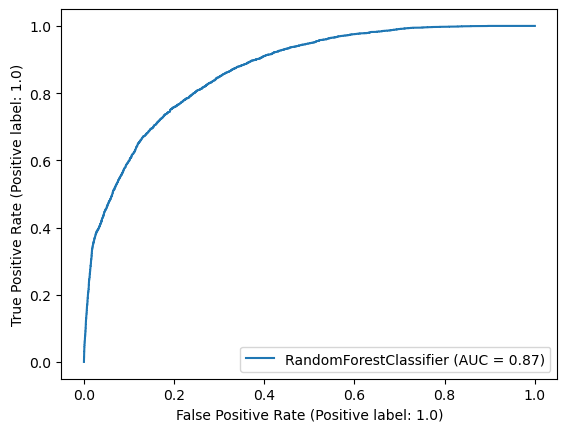

In [20]:
clf.fit(x_SemNorm, y)
testeroc = RocCurveDisplay.from_estimator(clf, x_SemNorm, y)
plt.show()

Exibe a quantidade de dados de cada classe

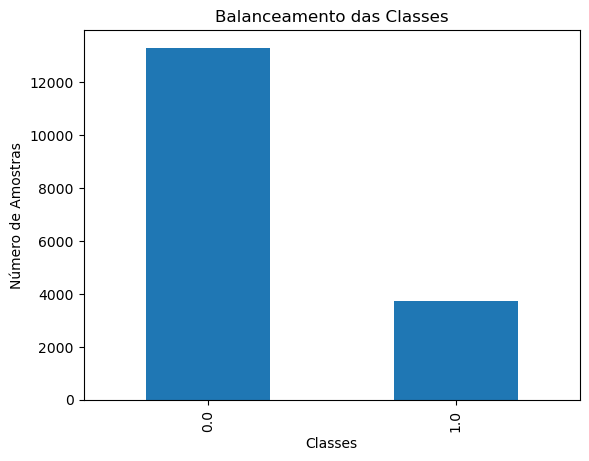

In [21]:
count_classes = y.value_counts()
count_classes.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Número de Amostras')
plt.title('Balanceamento das Classes')
plt.show()

In [22]:
for classe, quantidade in count_classes.items():
    print(f"Classe {classe}: {quantidade} amostras")

Classe 0.0: 13317 amostras
Classe 1.0: 3716 amostras


Faz o balanceamento das classes

In [23]:
# Aplicando undersampling
#undersampler = RandomUnderSampler(random_state=42)
#x_SemNorm, y = undersampler.fit_resample(x_SemNorm, y)

# Aplicando oversampling
oversampler = RandomOverSampler(random_state=42)
x_SemNorm, y = oversampler.fit_resample(x_SemNorm, y)

In [24]:
count_classes = y.value_counts()
for classe, quantidade in count_classes.items():
    print(f"Classe {classe}: {quantidade} amostras")

Classe 1.0: 13317 amostras
Classe 0.0: 13317 amostras


Faz a classificação com os dados desbalanceados

In [25]:
score = cross_val_score(clf, x_SemNorm, y, cv=10)
print(f"Desempenho do RandomForest no dataset foi: {score}")
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(score), np.std(score)))

Desempenho do RandomForest no dataset foi: [0.76839339 0.76088589 0.79241742 0.78641141 0.77393917 0.78445362
 0.77431468 0.76605332 0.78520466 0.77093504]
Média: 0.78 | Desvio: 0.0098


In [26]:
print(x_SemNorm.dtypes)

CO_REGIONA    float64
CO_MUN_NOT    float64
CO_UNI_NOT    float64
CS_SEXO       float64
CS_RACA       float64
CO_RG_RESI    float64
CO_MUN_RES    float64
CS_ZONA       float64
NOSOCOMIAL    float64
FEBRE         float64
TOSSE         float64
GARGANTA      float64
DISPNEIA      float64
DESC_RESP     float64
SATURACAO     float64
DIARREIA      float64
VOMITO        float64
OUTRO_SIN     float64
FATOR_RISC    float64
CARDIOPATI    float64
DIABETES      float64
OUT_MORBI     float64
ANTIVIRAL     float64
HOSPITAL      float64
CO_RG_INTE    float64
CO_MU_INTE    float64
UTI           float64
SUPORT_VEN    float64
RAIOX_RES     float64
AMOSTRA       float64
TP_AMOSTRA    float64
PCR_RESUL     float64
CRITERIO      float64
DOR_ABD       float64
FADIGA        float64
PERD_OLFT     float64
PERD_PALA     float64
TOMO_RES      float64
RES_AN        float64
ESTRANG       float64
VACINA_COV    float64
SEM_NOT       float64
SEM_PRI       float64
NU_IDADE_N    float64
CS_GESTANT    float64
DT_SIN_PRI

In [27]:
data = pd.concat([x_SemNorm, y], axis=1)
data.to_csv('dataset.csv')